# Tremor Models using Stat Features
This notebook covers all the process of definition preprocessing, training and evaluation for 3 tremor inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have tremor (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle

from src.settings import ROOT_DIR
from src.utils.data_split import get_features_target
from src.evaluation.model_metrics_report import print_sklearn_model_metrics
from src.model.standard_models_builder import build_models_modules
from src.evaluation.model_metrics_report import print_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'tremor-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'tremor-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

12410

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

## Models
Define and train the models using GridSearch

In [5]:
svm, knn, gboost = build_models_modules(X_train, y_train)

Started Grid Search - Model: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters SVM: {'C': 100, 'kernel': 'rbf'}
Finished Grid Search - Model: SVM
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 11, 'weights': 'distance'}
Finished Grid Search - Model: KNN
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 64, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

svm = SVC(probability=True, kernel='rbf', C=100)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn.fit(X_train, y_train)

gboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=64, n_iter_no_change=20)
gboost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=64, n_iter_no_change=20)

## Train Metrics

In [3]:
results_path = ROOT_DIR / 'results' / 'models' / 'tremor-features'
with open(results_path / 'model.svm.pkl', 'rb') as file:
    svm = pickle.load(file)

with open(results_path / 'model.knn.pkl', 'rb') as file:
    knn = pickle.load(file)

with open(results_path / 'model.gboost.pkl', 'rb') as file:
    gboost = pickle.load(file)

Accuracy: 0.8741337630942788
0.29767617152822623
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10461
           1       0.98      0.20      0.34      1949

    accuracy                           0.87     12410
   macro avg       0.93      0.60      0.63     12410
weighted avg       0.89      0.87      0.84     12410

AUC-ROC: 0.6007428995841723
AUC-PR: 0.6550003839097984


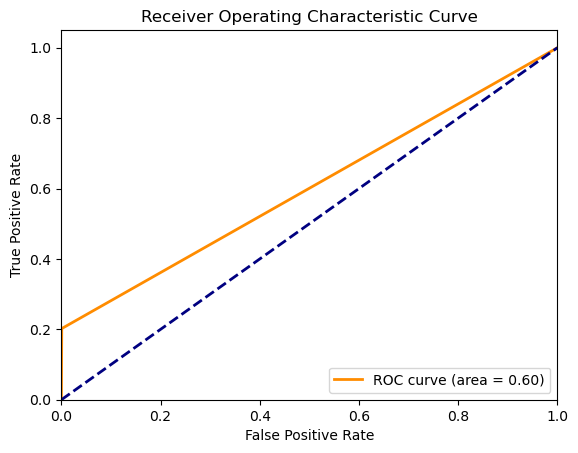

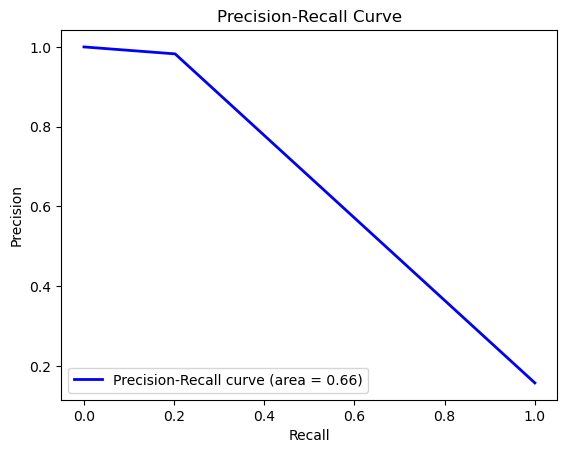

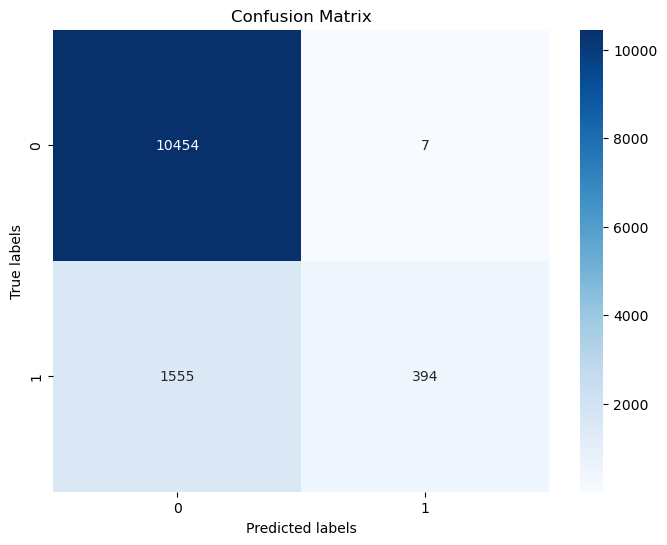

In [6]:
print_sklearn_model_metrics(svm, X_train, y_train.to_numpy())

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10461
           1       1.00      1.00      1.00      1949

    accuracy                           1.00     12410
   macro avg       1.00      1.00      1.00     12410
weighted avg       1.00      1.00      1.00     12410

AUC-ROC: 1.0
AUC-PR: 1.0


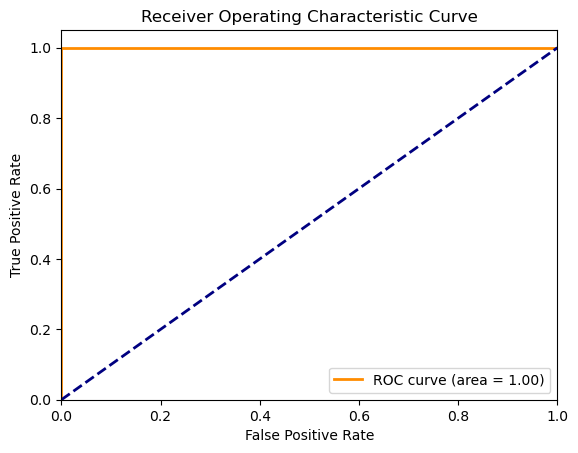

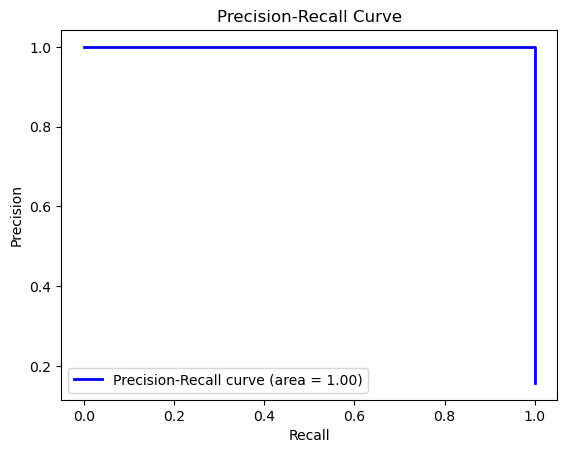

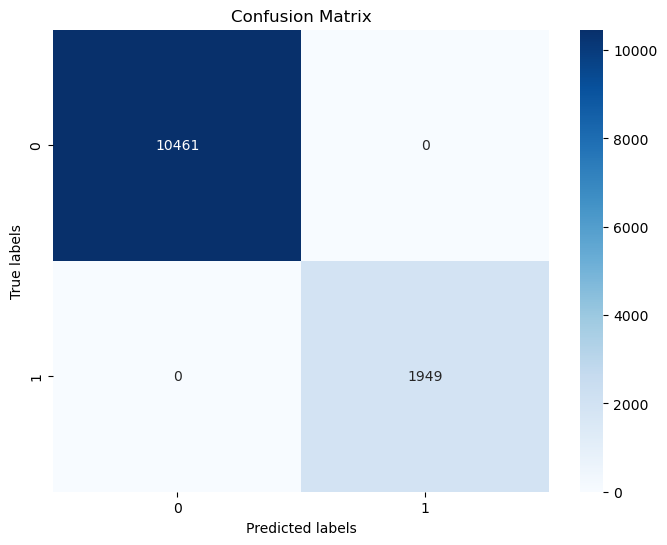

In [7]:
print_sklearn_model_metrics(knn, X_train, y_train.to_numpy())

Accuracy: 0.9095890410958904
0.567306356665713
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10461
           1       0.94      0.45      0.61      1949

    accuracy                           0.91     12410
   macro avg       0.92      0.72      0.78     12410
weighted avg       0.91      0.91      0.90     12410

AUC-ROC: 0.7238498154522388
AUC-PR: 0.7396567019588682


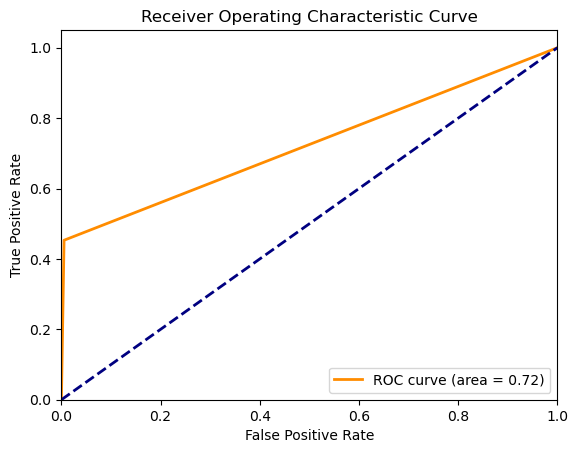

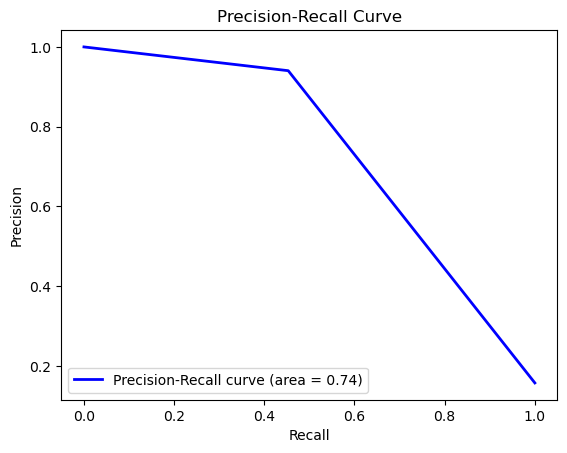

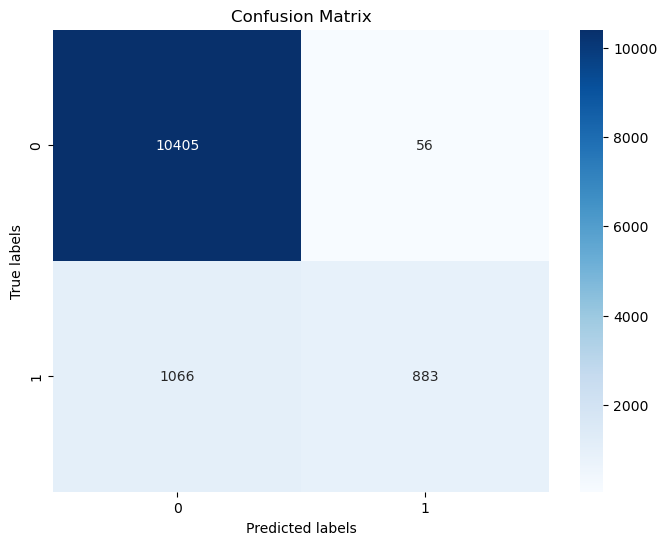

In [8]:
print_sklearn_model_metrics(gboost, X_train, y_train.to_numpy())

## Val Metrics

Accuracy: 0.8726833199033038
0.26974987709863396
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2102
           1       0.92      0.18      0.31       380

    accuracy                           0.87      2482
   macro avg       0.90      0.59      0.62      2482
weighted avg       0.88      0.87      0.83      2482

AUC-ROC: 0.5906780509790174
AUC-PR: 0.6150812163365706


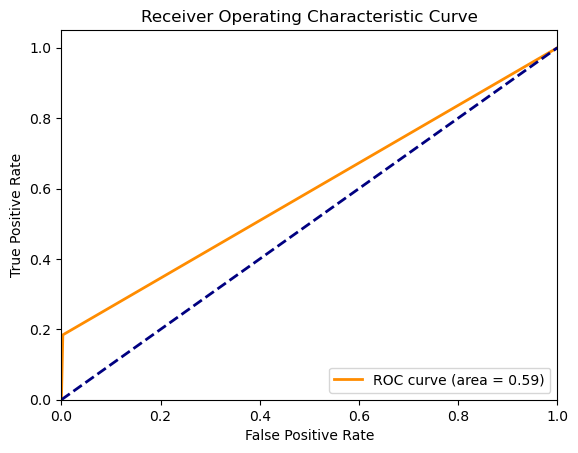

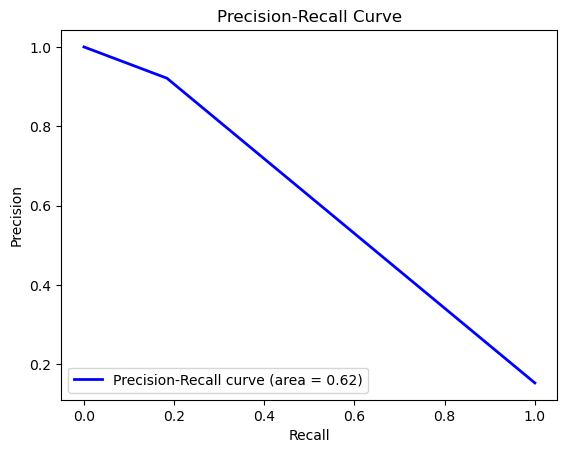

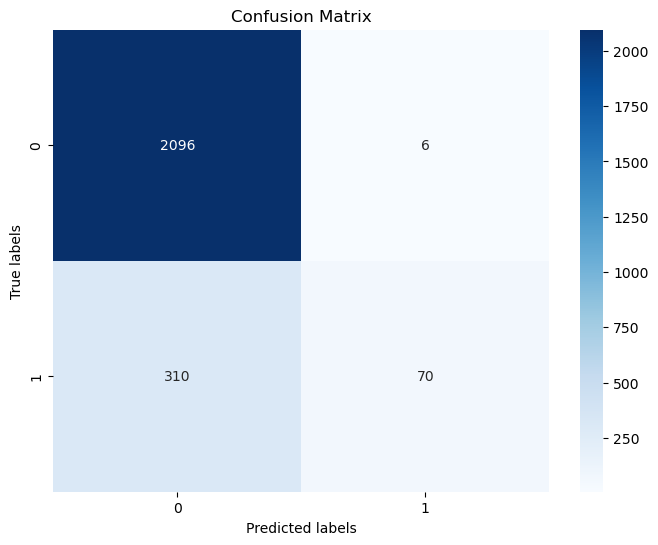

In [9]:
print_sklearn_model_metrics(svm, X_val, y_val)

Accuracy: 0.8746978243352136
0.32563422019614996
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2102
           1       0.79      0.24      0.37       380

    accuracy                           0.87      2482
   macro avg       0.84      0.62      0.65      2482
weighted avg       0.87      0.87      0.85      2482

AUC-ROC: 0.6166595723371225
AUC-PR: 0.5776205956843388


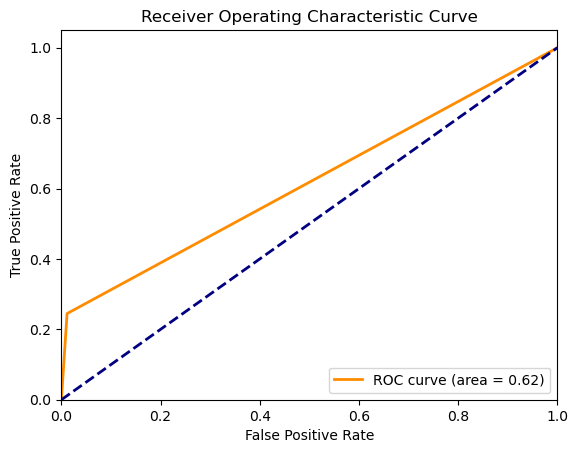

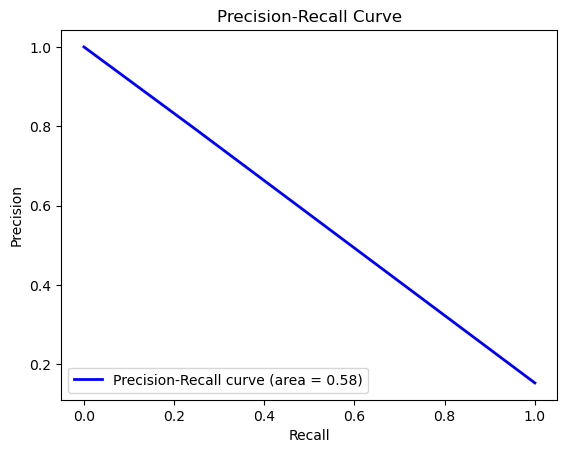

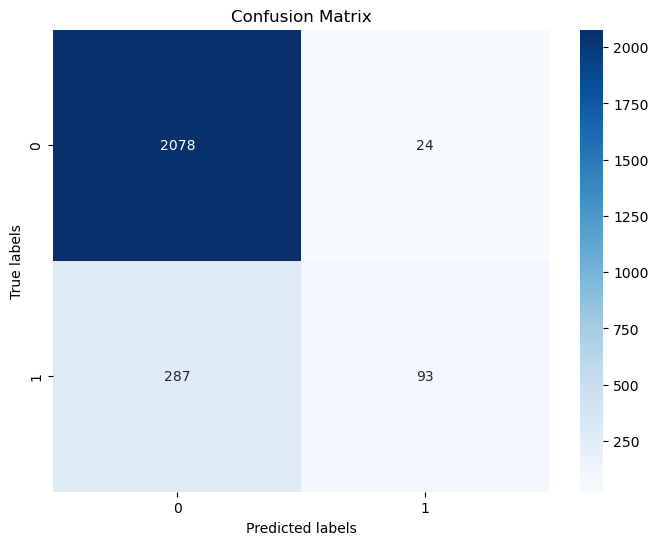

In [10]:
print_sklearn_model_metrics(knn, X_val, y_val)

Accuracy: 0.9077356970185334
0.5507511219800597
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2102
           1       0.90      0.44      0.60       380

    accuracy                           0.91      2482
   macro avg       0.91      0.72      0.77      2482
weighted avg       0.91      0.91      0.89      2482

AUC-ROC: 0.7180867845159998
AUC-PR: 0.7167461223199381


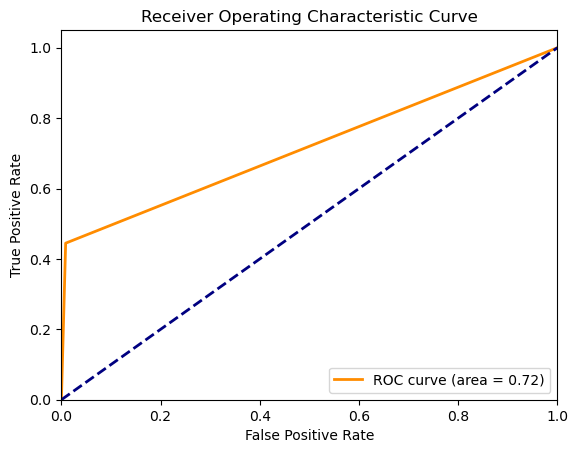

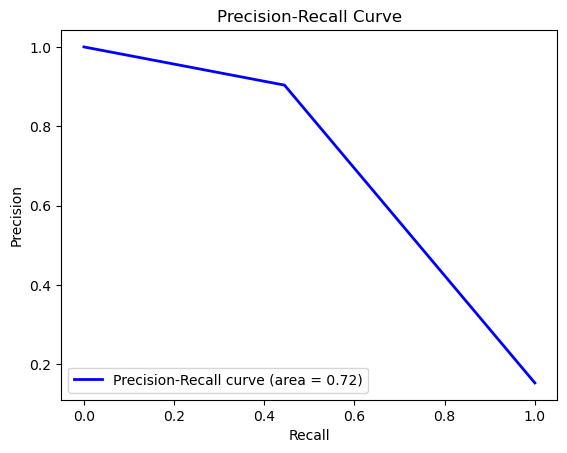

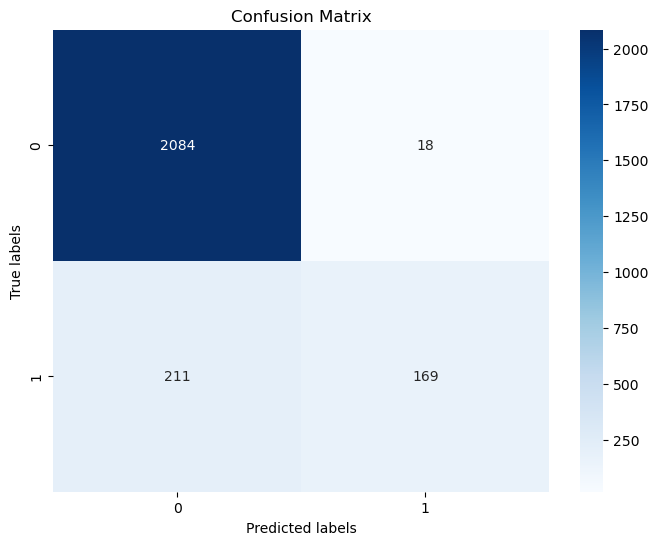

In [11]:
print_sklearn_model_metrics(gboost, X_val, y_val)

## Save models

In [6]:
save_path = str(ROOT_DIR) + '/results/models/tremor-features/'

os.makedirs(save_path, exist_ok=True)
with open(save_path + 'model.svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
    file.close()

with open(save_path + 'model.knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()

with open(save_path + 'model.gboost.pkl', 'wb') as file:
    pickle.dump(gboost, file)
    file.close()